In [42]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [43]:
House=pd.read_csv("C:/Users/HP/OneDrive/Desktop/HousePricePrediction.csv")

In [45]:
House.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [46]:
House.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [47]:
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


# DATA PREPROCESS


In [60]:
# to check if there are null values
House.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [57]:
House[House['Exterior1st'].isnull()]


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2151,2151,30,RL,19550,Inside,1Fam,7,1940,2007,NaN,0.0,1580.0,NaN


In [58]:
House[House['BsmtFinSF2'].isnull()]

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2120,2120,20,RM,5940,FR3,1Fam,7,1946,1950,MetalSd,NaN,NaN,NaN


In [59]:
House[House['TotalBsmtSF'].isnull()]

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2120,2120,20,RM,5940,FR3,1Fam,7,1946,1950,MetalSd,NaN,NaN,NaN


In [64]:
#to handle missing values
House.dropna(inplace=True)

In [65]:
House.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [67]:
House.shape

(1460, 13)

In [68]:
# to remove duplicate values
count=0
r,c=House.shape
House.drop_duplicates(inplace=True)




In [69]:
# to convert data from string type or categorical type to numerical form
from sklearn.preprocessing import LabelEncoder
category=["MSZoning","LotConfig","BldgType","Exterior1st"]
le=LabelEncoder()
House[category]=House[category].apply(le.fit_transform)


In [70]:
# after conversion data is 
House.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0,208500.0
1,1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0,181500.0
2,2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0,223500.0
3,3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0,140000.0
4,4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0,250000.0


<Axes: >

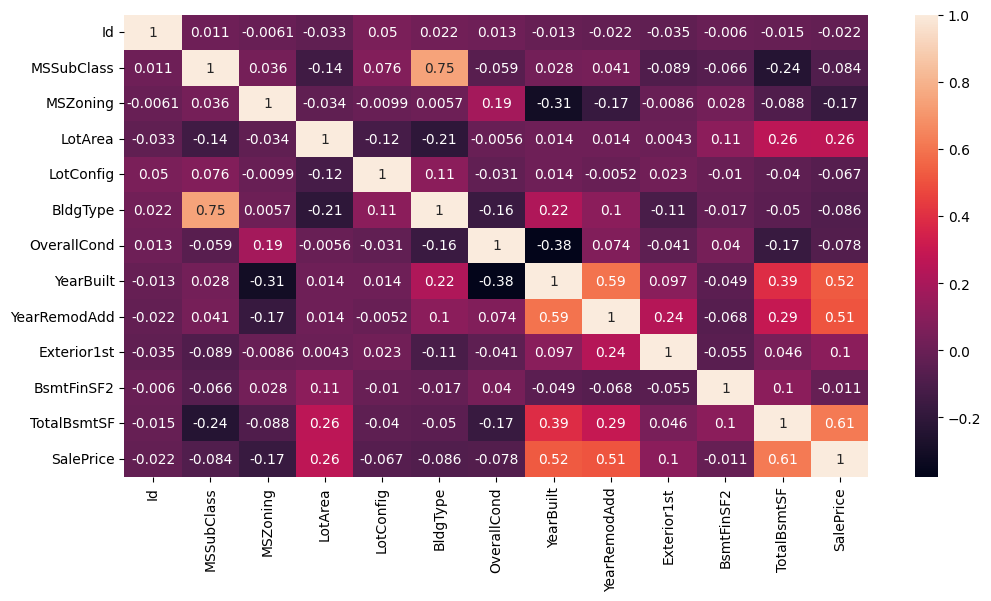

In [100]:
plt.figure(figsize=(12,6))
sn.heatmap(House.corr(),annot=True)

# Split dataset

In [72]:
X=House.drop(['SalePrice'],axis=1)
y=House['SalePrice']

In [73]:
from sklearn.model_selection import train_test_split

In [75]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=45)

In [76]:
X_train

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
657,657,70,3,7200,4,0,6,1931,2000,11,0.0,776.0
1198,1198,20,3,9100,4,0,5,2001,2001,12,0.0,1212.0
1438,1438,20,4,7407,4,0,7,1957,1996,8,0.0,912.0
1087,1087,60,1,10574,4,0,5,2005,2006,12,0.0,1082.0
298,298,60,3,11700,4,0,6,1968,1968,6,175.0,702.0
...,...,...,...,...,...,...,...,...,...,...,...,...
580,580,20,3,14585,1,0,6,1960,1987,13,219.0,1144.0
163,163,45,3,5500,4,0,6,1956,1956,8,0.0,882.0
607,607,20,3,7800,4,0,8,1948,2002,8,0.0,896.0
414,414,60,3,11228,1,0,5,1993,1993,12,531.0,1080.0


# Linear Regression 

In [77]:
from sklearn.linear_model import LinearRegression

In [80]:
lr=LinearRegression()

In [81]:
# training model:
lr.fit(X_train,y_train)

LinearRegression()

In [85]:
coeff_df=pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])

In [86]:
coeff_df

,Coefficient
Id,0.028236
MSSubClass,489.116435
MSZoning,-1273.757966
LotArea,0.906604
LotConfig,-416.038387
BldgType,-21231.703498
OverallCond,6057.625918
YearBuilt,819.805506
YearRemodAdd,750.705185
Exterior1st,-433.140476


In [89]:
y_predict=lr.predict(X_test)

In [91]:
# to predict outcomes
y_predict

array([161452.75424409,  95361.72650755, 230168.51136955, 232002.5923361 ,
       188961.52159608, 153559.24907901, 265688.69449303, 217086.7137851 ,
       227351.40165718, 214783.09724737, 121506.48986114, 172449.55130796,
        93367.92106843, 132988.09435204, 243883.5416834 , 227931.65470921,
       200549.16212714, 163159.14954042, 116830.3255327 , 248314.20640123,
       159180.43735904, 243174.3699535 , 237216.23400144, 143270.20224764,
       244338.90674902, 163809.77958213, 199746.75858081, 222095.75638045,
       120494.90298587, 167438.10601956, 149625.40358283, 140173.17520955,
       218432.57726156,  89384.90185775, 209769.66891121, 178704.38687449,
       124490.35437399,  73469.20289257, 256789.96856492, 191003.38231954,
       173521.31821364, 252433.50970623, 246200.66222437, 194411.28540761,
       214621.78917651, 198467.73071696, 161065.75659179, 100946.8091577 ,
       329810.57203003,  79886.16696361, 231499.2501925 , 214469.46855189,
       270210.54414411, 1

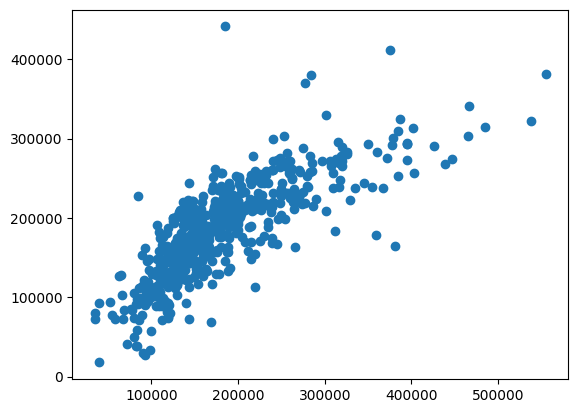

In [90]:
plt.scatter(y_test,y_predict)

# To evaluate model:

In [98]:
from sklearn.metrics import mean_absolute_error,r2_score
m=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)

In [95]:
m

34221.40612086654

In [99]:
score

0.6251419042493946